In [20]:
import math

import numpy as np
import xarray as xr
import xsdba
import matplotlib.pyplot as plt

In [10]:
t = xr.cftime_range("2000-01-01", "2030-12-31", freq="D", calendar="noleap")

/var/folders/6v/vrpsky6j509dff7250jyg8240000gp/T/ipykernel_29665/3472942113.py:1: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  t = xr.cftime_range("2000-01-01", "2030-12-31", freq="D", calendar="noleap")


In [11]:
s = np.arange(len(t))

In [21]:
math.floor(len(s) / 2)

5657

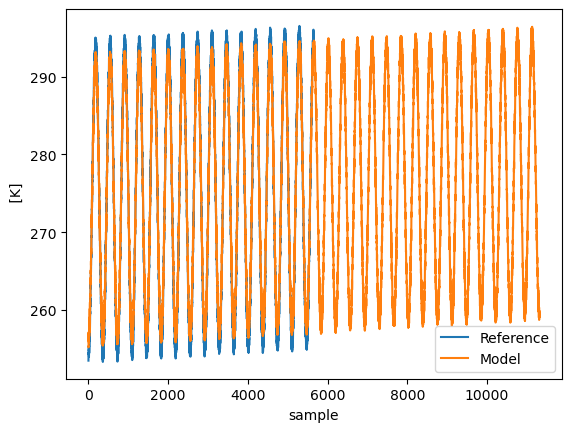

In [24]:
# Create toy data to explore bias adjustment

ref = xr.DataArray(
    (
        -20 * np.cos(2 * np.pi * t.dayofyear / 365)
        + 2 * np.random.random_sample((t.size,))
        + 273.15
        + 0.1 * (t - t[0]).days / 365
    ),  # "warming" of 1K per decade,
    dims=("sample",),
    coords={"sample": s},
    attrs={"units": "K"},
)
sim = xr.DataArray(
    (
        -18 * np.cos(2 * np.pi * t.dayofyear / 365)
        + 2 * np.random.random_sample((t.size,))
        + 273.15
        + 0.11 * (t - t[0]).days / 365
    ),  # "warming" of 1.1K per decade
    dims=("sample",),
    coords={"sample": s},
    attrs={"units": "K"},
)

ref = ref.isel(sample=slice(0, math.floor(len(s) / 2))) 
hist = sim.sel(sample=slice(0, math.floor(len(s) / 2)))

ref.plot(label="Reference")
sim.plot(label="Model")
plt.legend()
plt.show()

In [25]:
QM = xsdba.EmpiricalQuantileMapping.train(
    ref, hist, nquantiles=15, group="sample", kind="+"
)

AttributeError: 'DataArray' object has no attribute 'time'

In [ ]:
scen = QM.adjust(sim, extrapolation="constant", interp="nearest")